In [6]:
import numpy as np
from sklearn.datasets import fetch_mldata
from sklearn import datasets
from sklearn.model_selection import train_test_split
from src.neural_network import NeuralNetwork
from src.util import to_categorical
from src.loss_function import SquareLoss
from src.layers import Conv2D, Dense, Dropout, Activation, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [7]:

dataset = datasets.load_digits()
X = dataset.data
y = dataset.target

y = to_categorical(y.astype("int"))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# print(X_train.shape)
X_train = X_train[:256]
y_train = y_train[:256]
X_train = X_train.reshape((-1,1,8,8))
X_test = X_test.reshape((-1,1,8,8))
X_test = X_train[:256]
y_test = y_train[:256]

In [8]:

# Model 
model = NeuralNetwork(SquareLoss(),
                    (X_test, y_test))
model.add(Conv2D(16, filter_shape=(3,3), stride=1, input_shape=(1,8,8), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(p = 0.2))
model.add(Conv2D(n_filters=32, filter_shape=(3,3), stride=1, padding='same'))
model.add(Activation('relu'))
model.add(Dropout(p = 0.2))
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(10))
model.add(Activation('softmax'))

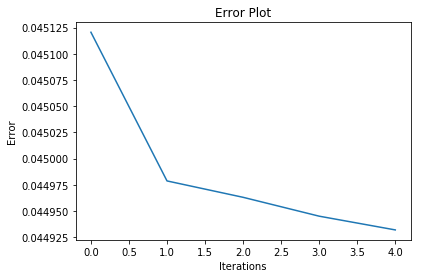

Accuracy: 0


In [9]:
train_err = model.fit(X_train, y_train, n_epochs=5, batch_size=256)

# print(model.layers[-1])

n = len(train_err)
training, = plt.plot(range(n), train_err, label="Training Error")
# validation, = plt.plot(range(n), val_err, label="Validation Error")
# plt.legend(handles=[training, validation])
plt.title("Error Plot")
plt.ylabel('Error')
plt.xlabel('Iterations')
plt.show()

_, accuracy = model.test_on_batch(X_test, y_test)
print ("Accuracy:", accuracy)
# y_pred = np.argmax(model.predict(X_test), axis=1)
# X_test = X_test.reshape(-1, 8*8)
# print(y_pred[:10], y_test[:10])
# print(accuracy_score(y_pred, y_test))
# Plot().plot_in_2d(X_test, y_pred, title="Convolutional Neural Network", accuracy=accuracy, legend_labels=range(10))